<a href="https://colab.research.google.com/github/torontoniancoder/python_tutorial/blob/master/gulnev_andrei_final_project_vC7_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# importing pandas and numpy
import pandas as pd
import numpy as np

A. Data cleaning

In [103]:
def clean_data(df):
    pd.set_option('mode.use_inf_as_na', True) # to recognise inf as a NaN in calculations: from here: https://stackoverflow.com/questions/58225701/change-pandas-default-fillna-setting
    # todo: replace the nan values with relevant (??) values (MEAN?) -> replaced with 0-es
    # selecting the columns for conversion from categorical data into columns of binary data
    df_temp = df[['Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years']]
    # integer encoding
    # source for instructions: https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
    # turning the type columns into the dummy variables
    # No nan values therefore dummy_na=False
    dummy = pd.get_dummies(df_temp, dummy_na=False, columns=['Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years'], prefix=['Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years'], dtype=int, drop_first=False)
    # concatenating binary data into the initial dataframe
    df = pd.concat([df,dummy], axis=1)
    # dropping the unnecessary fields
    # FieldDrop0 = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years']
    # df = df.drop(FieldDrop0, axis=1)
    colnames = df.columns.values.tolist() #converting column names into a list
    # colnames
    # counting nan values and removing columns with nan values more than 50% (threshold can be modified *there -> <-*)
    for each in colnames:
        # print(type(df[each]))
        if (( df[each].isna().sum() / len(df[each]) ) > 0.5): # *-> <-* here! the threshold can be modified | source URL: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
            print ('Due to low data quality\n(data not available for more than 50% of data points)\nI am deleting this column: '+each)
            # *-> <-* here! in the line above the threshold must be modified if it si changed in the previous line
            del df[each]
        else:
            df[each] = df[each].fillna(0)
            # df[each] = df[each].astype('string')
            pass
            # z = ( df[each].isna().sum() / len(df[each]) )*100
            # print('For column '+str(each)+' unknown datapoints are '+str(z)+'% of series')
    # df.info()
    # df = df.astype('string') # source URL: https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
    # df[["D", "E"]] = df[["D", "E"]].astype(int)
    #   cleaning temporary data
    df_temp = 0
    return df

In [104]:
df = pd.read_csv('Black_Friday.csv') #loading data into a dataframe

In [105]:
# *** REMOVE BEFORE ASSEMBLY *** BEGIN
df = df.iloc[:100] # slicing dataframe for test&dev performance
df.shape
# *** REMOVE BEFORE ASSEMBLY *** END

(100, 12)

In [106]:
# keeping a control copy of the source dataset in variable df0
df0 = df.copy()

In [107]:
df = clean_data(df) # running function clean_data on a dataframe

Due to low data quality
(data not available for more than 50% of data points)
I am deleting this column: Product_Category_3


B. Data Analysis

In [108]:
# 1- Compare number of customers, and total amount of purchase for each gender? Is this a balance dataset with respect to gender? (5%)
# 2- Compare total amount of purchase for different cities. (5%)
# 3- Compare total amount of purchase for combinations of gender and age. Which gender and age is better target for marketing campaign? (5%)
# 4- Using box and whisker plot, compare distribution of purchase amounts among combinations of genders and age. (5%)
# 5- Using box and whisker plot, compare distribution of purchase amounts among different occupations. (5%)
# 6- (Optional) Create a heatmap or scatter plot showing correlation matrix of all of two numerical features. Which features are positively correlated with purchase amount? (+10%)

In [109]:
# 1- Compare number of customers,
# and total amount of purchase for each gender?
# Is this a balance dataset with respect to gender? (5%)

# Columns: User_ID, Gender, Purchase

In [110]:
# building Multi-Index
a = df.User_ID.tolist()
b = df.Gender.tolist()
arrays = np.array([a,b])
index = pd.MultiIndex.from_arrays(arrays, names =['customer','gender'])

In [111]:
# loading Purchase amounts data into c
c = df['Purchase'].tolist()

In [112]:
# applying Multi-Index to data
s = pd.Series(c, index=index)

In [113]:
# grouping by gender
most = s.groupby(level=['gender']).sum()
# print(most)

In [114]:
# double-check
# summa = df.Purchase.sum()
# most.sum()

In [115]:
# grouping by amount of unique customers
s2 = s.groupby([pd.Grouper(level=1), 'customer']).count().copy() # grouping by customer and copying into new variable s2
customers_by_genger = s2.groupby(level=['gender']).count() #counting unique customers and grouping them by gender

B1. Comparing number of customers,
 and total amount of purchase for each gender?
 Is this a balance dataset with respect to gender?

Number of customers by gender:

In [116]:
print(customers_by_genger)

gender
F     6
M    15
dtype: int64


Total amount of purchase (sum of purchases) for each gender:

In [117]:
print (most)

gender
F    473435
M    534059
dtype: int64


Average amount of cumulative purchases by gender:

In [118]:
avg_purchase = (most/customers_by_genger)
print(avg_purchase)

gender
F    78905.833333
M    35603.933333
dtype: float64


In [119]:
# B2- Compare total amount of purchase for different cities. (5%)
# building Multi-Index
# df.groupby
# print(most)

In [120]:
# index_b2 = df['City_Category'].tolist() # preparing index


In [121]:
# df_b2 = pd.DataFrame(data=df, index=index_b2).copy() # copying the dataframe and indexing by City_Category
a_b2 = df.City_Category.tolist()
b_b2 = df.Purchase.tolist()
arrays_b2 = np.array([a_b2, b_b2])
index_b2 = pd.MultiIndex.from_arrays(arrays_b2, names=['City_Category','Purchase'])
c_b2 = df['Purchase'].tolist() # loading purchase data into list
s_b2 = pd.Series (c_b2, index=index_b2)# applying multi-index to data

In [122]:
# grouping sales by City Category
Sales_By_City = s_b2.groupby(['City_Category']).sum()
# sorting
Sales_By_City = Sales_By_City.sort_values()

B2. Total amount of purchase for different cities:

In [123]:
Sales_By_City

City_Category
C    264056
A    313799
B    429639
dtype: int64

In [124]:
# B3. Compare total amount of purchase for combinations of gender and age.
# Which gender and age is better target for marketing campaign? (5%)
# df_b2 = pd.DataFrame(data=df, index=index_b2).copy() # copying the dataframe and indexing by City_Category

In [125]:
a_b3 = df.Age.tolist()
b_b3 = df.Gender.tolist()
arrays_b3 = np.array([a_b3, b_b3])
index_b3 = pd.MultiIndex.from_arrays(arrays_b3, names=['age','gender'])
c_b3 = df['Purchase'].tolist() # loading purchase data into list
s_b3 = pd.Series (c_b3, index=index_b3)# applying multi-index to data

In [126]:
# s_b3.groupby(level=['age','gender']).sum()

1.0074940000000001
gender  age  
F       0-17     0.026049
        18-25    0.162046
        26-35    0.033525
        36-45    0.222452
        51-55    0.029363
M       0-17     0.108567
        18-25    0.023951
        26-35    0.251670
        36-45    0.017636
        46-50    0.084613
        51-55    0.039653
        55+      0.007969
dtype: float64
gender  age  
F       0-17      2.585524
        18-25    16.084066
        26-35     3.327563
        36-45    22.079734
        51-55     2.914459
M       0-17     10.775945
        18-25     2.377285
        26-35    24.979801
        36-45     1.750482
        46-50     8.398363
        51-55     3.935805
        55+       0.790972
dtype: float64


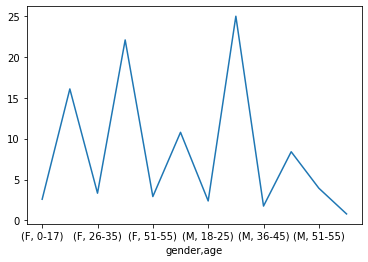

In [127]:
sales_b3_mln = (s_b3.groupby(level=['gender','age']).sum())/1000000
sales_b3_mln_totals = sales_b3_mln.sum()
print(sales_b3_mln_totals)
sales_b3_rltv = (sales_b3_mln / sales_b3_mln_totals)*100
print(sales_b3_mln)
print(sales_b3_rltv)
sales_b3_rltv.plot()

B3. Compare total amount of purchase for combinations of gender and age.

Which gender and age is better target for marketing campaign? (5%)

Males aged 26-35 years represent one third of total sales
Three groups combined (males 18-45 years old) are largest spenders
and represent 60.51% of total sales.

In [128]:
# B4- Using box and whisker plot, compare distribution of purchase amounts
# among combinations of genders and age. (5%)
# Source URL: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# we can use the series from the previous question,
# let's make a copy under variable s_b4

s_b4 = s_b3.copy()

In [129]:
# print(s_b4)

In [130]:
x = s_b4.groupby(['age','gender']).sum()

In [131]:
x_df = pd.DataFrame(data=x, columns=['purchase'], copy=True)

In [132]:
# x_df.groupby(by='gender').sum()
x_a = x.copy() # copying data for x axis
x_a = x_a.sort_values() # sotring
x_a = x_a / 1000000 # converting data into millions

In [133]:
# selecting the data for x axis for different genders
x_m = x_df.filter(like = 'M', axis=0) # source code URL: https://datatofish.com/filter-pandas-dataframe/
x_f = x_df.filter(like = 'F', axis=0)

In [134]:
x_mlist = x_m.purchase.tolist()
x_flist = x_f.purchase.tolist()
x_axislist = x_a.tolist()

In [135]:
# plotting the data, source URL: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# Import libraries
import matplotlib.pyplot as plt
# import numpy as np

In [136]:
'''
# Creating dataset
np.random.seed(10)

data_1 = x_mlist
data_2 = x_flist
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2] # , data_3, data_4]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()
'''

'\n# Creating dataset\nnp.random.seed(10)\n\ndata_1 = x_mlist\ndata_2 = x_flist\n# data_3 = np.random.normal(80, 30, 200)\n# data_4 = np.random.normal(70, 40, 200)\ndata = [data_1, data_2] # , data_3, data_4]\n\nfig = plt.figure(figsize =(10, 7))\n\n# Creating axes instance\nax = fig.add_axes([0, 0, 1, 1])\n\n# Creating plot\nbp = ax.boxplot(data)\n\n# show plot\nplt.show()\n'

B4 - Using box and whisker plot, compare distribution of purchase amounts
 among combinations of genders and age.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


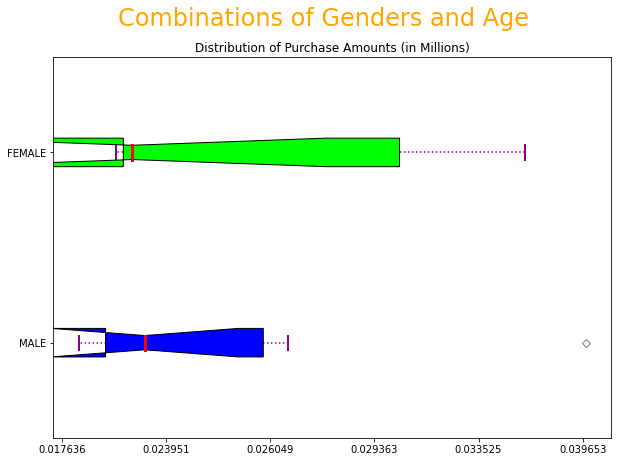

In [137]:
# Creating dataset
data_1 = x_mlist
data_2 = x_flist
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00']
          # '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and line width of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['MALE', 'FEMALE'])
                    # 'data_3', 'data_4'])
ax.set_xticklabels(x_axislist)

# Adding title
plt.title("Distribution of Purchase Amounts (in Millions)")
fig.suptitle('Combinations of Genders and Age', color='orange', fontsize=24)
# Removing top axes and right axes
# ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show(bp)

# todo: figure our mapping the age distribution data to axis and labels on the graph

In [138]:
# B5- Using box and whisker plot, compare distribution of purchase amounts
# among different occupations.

In [139]:
a_b5 = df.Occupation.tolist()
b_b5 = df.Gender.tolist()
arrays_b5 = np.array([a_b5, b_b5])
index_b5 = pd.MultiIndex.from_arrays(arrays_b5, names=['occupation','gender'])
c_b5 = df['Purchase'].tolist() # loading purchase data into list
s_b5 = pd.Series (c_b5, index=index_b5)# applying multi-index to data



In [140]:
x_b5 = s_b5.groupby(['occupation']).sum().copy() # getting data for x axis

In [141]:
x_b5.sort_values() # sorting

occupation
16     11024
0      26305
9      29363
17     34913
15     36123
20     38820
12     87833
7     125632
10    134616
3     162046
1     320819
dtype: int64

In [142]:
x_b5 = x_b5 / 1000000 # converting data into millions

In [143]:
b5_index = x_b5.index.tolist() # getting index into list

B5 - Using box and whisker plot, compare distribution of purchase amounts among different occupations.

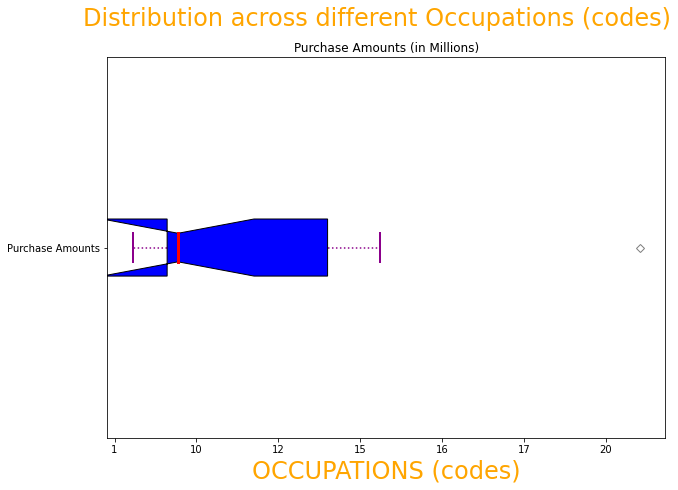

In [144]:
# plotting the data, source URL: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# Creating dataset
data_b5 = x_b5
# data_2 = x_flist
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
data = [data_b5]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00']
          # '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and line width of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Purchase Amounts'])
                    # 'data_3', 'data_4'])
ax.set_xticklabels(b5_index)

# Adding title
plt.title("Purchase Amounts (in Millions)")
fig.suptitle('Distribution across different Occupations (codes)', color='orange', fontsize=24)
plt.xlabel('OCCUPATIONS (codes)', color='orange', fontsize=24)
# Removing top axes and right axes
# ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show(bp)
# todo: figure our mapping the occupations codes to axis and labels on the graph

In [145]:
 # dropping the unnecessary fields
FieldDrop0 = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years']
df = df.drop(FieldDrop0, axis=1)

df_corr = df.corr() # creating the correlation matrix with the .corr() function

In [146]:
import seaborn as sb

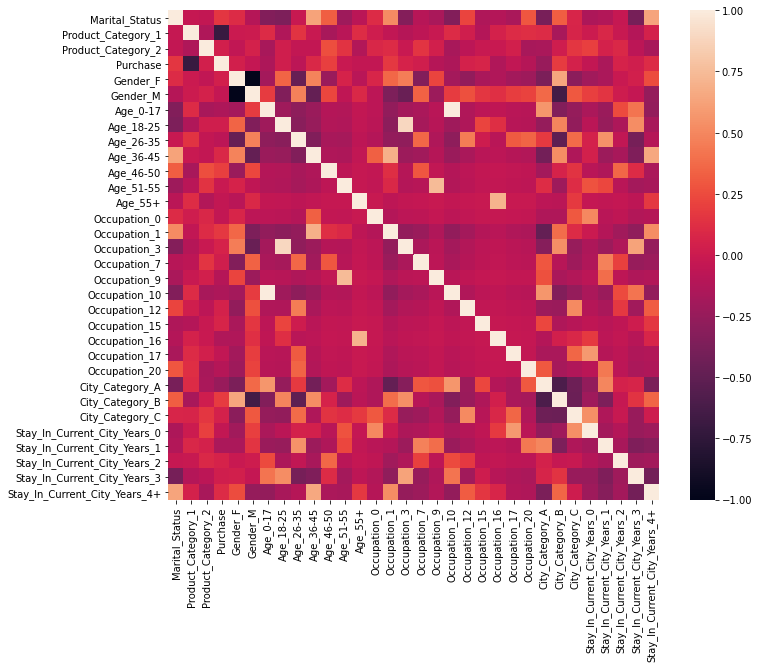

In [147]:
fig_sb, ax_sb = plt.subplots(figsize=(11, 9))
sb.heatmap(df_corr)
plt.show()

In [148]:
colnames = 0 # empty variable for column names
colnames = df_corr.columns.values.tolist() # writing column names into the iterable variable
Feature_Positive_Corr = list(()) # creating an empty list for positively correlated features
Feature_Negative_Corr = list(()) # creating an empty list for negatively correlated features
# for each in colnames:
length = len(df_corr['Purchase'])
for i in range(0,length):
    if (df_corr.iloc[i]['Purchase']  > 0.1) and (df_corr.index[i] != 'Purchase'):
        # print('\n* *XX*|||*XX* * !!WARNING!! ['+str(each)+'] IS CORRELATED WITH '+str(CorrKoeff.index[i])+' BY '+str(CorrKoeff.iloc[i][each])+' * *XX*|||*XX* *')
        Feature_Positive_Corr.append(df_corr.index[i])
        # pass
    elif (df_corr.iloc[i]['Purchase']  < -0.1) and (df_corr.index[i] != 'Purchase'):
            # print('\n- *XX*XX* - Attention: ['+str(each)+'] is correlated with ['+str(CorrKoeff.index[i])+'] by '+str(CorrKoeff.iloc[i][each])+' - *XX*XX* -\n')
            Feature_Negative_Corr.append(df_corr.index[i])
            # pass
    else:
        pass
# print('----- * ----- '+str(each)+' is [COMPLETE] ----- * -----')

In [149]:
UFeatures_Pos = list(())
UFeatures_Neg = list(())

In [150]:
[UFeatures_Pos.append(x) for x in Feature_Positive_Corr if x not in UFeatures_Pos]

[None, None, None, None, None]

In [151]:
[UFeatures_Neg.append(z) for z in Feature_Negative_Corr if z not in UFeatures_Neg]

[None, None, None, None, None, None, None, None]

Here is a list of features that are positively correlated
with the purchase amount:

In [152]:
display(UFeatures_Pos)

['Marital_Status',
 'Age_46-50',
 'Occupation_1',
 'City_Category_B',
 'Stay_In_Current_City_Years_4+']

Here is a list of features that are negatively correlated
with the purchase amount:

In [153]:
display(UFeatures_Neg)

['Product_Category_1',
 'Age_0-17',
 'Occupation_9',
 'Occupation_10',
 'Occupation_16',
 'Occupation_20',
 'City_Category_A',
 'Stay_In_Current_City_Years_1']

C. Data Modeling

In [154]:
# source code URL: https://habr.com/ru/post/206306/
# and here, URL: https://habr.com/ru/post/202090/

# importing libraries

from pandas import read_csv, DataFrame
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score
# from sklearn import cross_validation, svm
# from sklearn.cross_validation import train_test_split

In [155]:
# creating dataset with summary data per UserID

# df_c1 = df.copy() #loading data into a dataframe

In [156]:
# df_c1 = clean_data(df_c1) #
# PreFinal_df = df.groupby('User_ID').sum()

In [157]:
# df_c1.info()

In [158]:
# df_c1 = df_c1.astype(str)

In [159]:
# df_c1.info()

In [160]:
# To begin with, we need to divide our training sample
# into the indicator that we are examining, and its defining features:
# todo: check features for cross-correlation, see source code
#  here, URL: http://espressocode.top/python-pandas-dataframe-corr/

# PreFinal_df

In [161]:
# FieldDrop_PID = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years']
# df = df.drop(FieldDrop_PID, axis=1)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 100 non-null    int64  
 1   Product_Category_1             100 non-null    int64  
 2   Product_Category_2             100 non-null    float64
 3   Purchase                       100 non-null    int64  
 4   Gender_F                       100 non-null    int64  
 5   Gender_M                       100 non-null    int64  
 6   Age_0-17                       100 non-null    int64  
 7   Age_18-25                      100 non-null    int64  
 8   Age_26-35                      100 non-null    int64  
 9   Age_36-45                      100 non-null    int64  
 10  Age_46-50                      100 non-null    int64  
 11  Age_51-55                      100 non-null    int64  
 12  Age_55+                        100 non-null    int6

In [163]:
df = df.astype(float)
# df.shape()
# df.info()

In [164]:
# checking the correlation between the features
CorrKoeff = df.corr()

In [165]:
colnames = 0

In [166]:
colnames = CorrKoeff.columns.values.tolist()

In [167]:
Feature_Drop = list(())
Feature_DropNeg = list(())

In [168]:
for each in colnames:
    i = len(CorrKoeff[each])
    for i in range(i):
        if (CorrKoeff.iloc[i][each]  > 0.8) and (CorrKoeff.index[i] != each):
            # print('\n* *XX*|||*XX* * !!WARNING!! ['+str(each)+'] IS CORRELATED WITH '+str(CorrKoeff.index[i])+' BY '+str(CorrKoeff.iloc[i][each])+' * *XX*|||*XX* *')
            Feature_Drop.append(each)
            # pass
        elif (CorrKoeff.iloc[i][each]  < -0.8) and (CorrKoeff.index[i] != each):
            # print('\n- *XX*XX* - Attention: ['+str(each)+'] is correlated with ['+str(CorrKoeff.index[i])+'] by '+str(CorrKoeff.iloc[i][each])+' - *XX*XX* -\n')
            Feature_DropNeg.append(each)
            # pass
        else:
            pass
    # print('----- * ----- '+str(each)+' is [COMPLETE] ----- * -----')

In [169]:
# there is a correlation > 80% and <-80% between the features in df

In [170]:
# todo: drop the unnecessary features (columns)

In [171]:
len(Feature_Drop) # these are features that are absolutely certain
# to be removed

4

In [172]:
len(Feature_DropNeg) # these are features that are
# negatively correlated

2

In [173]:
UFeatures_Drop = list(())
UFeatures_DropNeg = list(())

In [174]:
[UFeatures_Drop.append(x) for x in Feature_Drop if x not in UFeatures_Drop]

[None, None, None, None]

In [175]:
[UFeatures_DropNeg.append(z) for z in Feature_DropNeg if z not in UFeatures_DropNeg]

[None, None]

In [176]:
length = len(UFeatures_Drop)
lengthNeg = len(UFeatures_DropNeg)

In [177]:
middle_index = length//2 # source code URL: https://www.kite.com/python/answers/how-to-split-a-list-in-half-in-python
middle_indexNeg = lengthNeg//2

In [178]:
len(UFeatures_Drop)

4

In [179]:
len(UFeatures_DropNeg)

2

In [180]:
UFeatures_Droph = UFeatures_Drop[:middle_index]
UFeatures_DropNegh = UFeatures_DropNeg[:middle_indexNeg]

In [181]:
len(UFeatures_Droph)

2

In [182]:
len(UFeatures_DropNegh)

1

In [183]:
UFeatures_Drop_United = UFeatures_Droph + UFeatures_DropNegh

In [184]:
len(UFeatures_Drop_United)

3

In [185]:
# df

In [186]:
newdf = df.drop(UFeatures_Drop_United, axis=1).copy()

In [187]:
# writing the Purchase data (targeted for prediction) into a separate dataset
target = df0['Purchase']
# dropping the unnecessary features
# todo: drop 'Purchase' from dataset

In [188]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 100 non-null    float64
 1   Product_Category_1             100 non-null    float64
 2   Product_Category_2             100 non-null    float64
 3   Purchase                       100 non-null    float64
 4   Gender_M                       100 non-null    float64
 5   Age_26-35                      100 non-null    float64
 6   Age_36-45                      100 non-null    float64
 7   Age_46-50                      100 non-null    float64
 8   Age_51-55                      100 non-null    float64
 9   Age_55+                        100 non-null    float64
 10  Occupation_0                   100 non-null    float64
 11  Occupation_1                   100 non-null    float64
 12  Occupation_3                   100 non-null    floa

In [189]:
colnamesP = newdf.columns.values.tolist()
DropColPurchase = ['Purchase']
Purchase = str('Purchase')

In [190]:
for sublist in colnamesP:
  if Purchase in sublist:
    newdf = newdf.drop(DropColPurchase, axis=1).copy()
  else:
    pass

In [191]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 100 non-null    float64
 1   Product_Category_1             100 non-null    float64
 2   Product_Category_2             100 non-null    float64
 3   Gender_M                       100 non-null    float64
 4   Age_26-35                      100 non-null    float64
 5   Age_36-45                      100 non-null    float64
 6   Age_46-50                      100 non-null    float64
 7   Age_51-55                      100 non-null    float64
 8   Age_55+                        100 non-null    float64
 9   Occupation_0                   100 non-null    float64
 10  Occupation_1                   100 non-null    float64
 11  Occupation_3                   100 non-null    float64
 12  Occupation_7                   100 non-null    floa

In [192]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     100 non-null    int64  
 1   Product_ID                  100 non-null    object 
 2   Gender                      100 non-null    object 
 3   Age                         100 non-null    object 
 4   Occupation                  100 non-null    int64  
 5   City_Category               100 non-null    object 
 6   Stay_In_Current_City_Years  100 non-null    object 
 7   Marital_Status              100 non-null    int64  
 8   Product_Category_1          100 non-null    int64  
 9   Product_Category_2          77 non-null     float64
 10  Product_Category_3          38 non-null     float64
 11  Purchase                    100 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [193]:
# newdf2.shape()

In [194]:
# newtr1 = newtr[['Gender_F','Gender_M','Age_0-17','Age_18-25','Age_26-35','Age_36-45','Age_46-50','Age_51-55','Age_55+','City_Category_A','City_Category_B','City_Category_C','Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1','Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3','Stay_In_Current_City_Years_4+']].copy()

In [195]:
# models = [LinearRegression(), # метод наименьших квадратов
#	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
#	          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
#	          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
#	          LogisticRegression() # логистическая регрессия
#	          ]



In [196]:
from sklearn.model_selection import train_test_split

In [197]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(newdf, target, test_size=0.2)


In [198]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)
print (Ytrn.shape)
print (Xtest.shape)
print (Ytest.shape)
# print X_test.shape, y_test.shape
# source code URL: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

--- Xtrn SHAPE ---
(80, 28)
(80,)
(20, 28)
(20,)


In [199]:
# re-indexation of datasets for consistency
# in the future operations of normalization
# Xtrn.reindex
# Ytrn.reindex
# Xtest.reindex
# Ytest.reindex

In [200]:
# *** Normalization of numerical columns with use of mean normalization ***
# We will normalize columns Product_Category_1 and Product_Category_2 in
# datasets Xtrn and Xtest (separately after having split the data between
# Xtrn and Xtest),
# so that the normalization in this way should NOT lead to
# the trained model being impacted by the
# normalization of the testing data together (in one set) with the training data

In [201]:
Xtrn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 95 to 80
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 80 non-null     float64
 1   Product_Category_1             80 non-null     float64
 2   Product_Category_2             80 non-null     float64
 3   Gender_M                       80 non-null     float64
 4   Age_26-35                      80 non-null     float64
 5   Age_36-45                      80 non-null     float64
 6   Age_46-50                      80 non-null     float64
 7   Age_51-55                      80 non-null     float64
 8   Age_55+                        80 non-null     float64
 9   Occupation_0                   80 non-null     float64
 10  Occupation_1                   80 non-null     float64
 11  Occupation_3                   80 non-null     float64
 12  Occupation_7                   80 non-null     floa

In [202]:
# extracting numeric data into the working arrays
numeric_data_Xtrn1 = Xtrn['Product_Category_1'].copy().to_numpy()
numeric_data_Xtrn2 = Xtrn['Product_Category_2'].copy().to_numpy()
numeric_data_Xtest1 = Xtest['Product_Category_1'].copy().to_numpy()
numeric_data_Xtest2 = Xtest['Product_Category_2'].copy().to_numpy()

In [203]:
# running normalize() from seaborn
# normalization function
# Source code URL: https://www.educative.io/edpresso/data-normalization-in-python
# and here URL: https://dev-gang.ru/article/-prostyh-sposoba-normalizovat-dannye-v-python-7qqrhmlppl/
from sklearn import preprocessing

normalized_data_Xtrn1 = preprocessing.normalize([numeric_data_Xtrn1])
normalized_data_Xtrn2 = preprocessing.normalize([numeric_data_Xtrn2])
normalized_data_Xtest1 = preprocessing.normalize([numeric_data_Xtest1])
normalized_data_Xtest2 = preprocessing.normalize([numeric_data_Xtest2])

In [204]:
# returning normalized data into the datasets and dropping numeric data
normalized_data_Xtrn1

array([[0.02161689, 0.02161689, 0.10808443, 0.04323377, 0.17293508,
        0.02161689, 0.06485066, 0.17293508, 0.10808443, 0.17293508,
        0.10808443, 0.02161689, 0.02161689, 0.10808443, 0.02161689,
        0.17293508, 0.04323377, 0.10808443, 0.17293508, 0.02161689,
        0.02161689, 0.02161689, 0.17293508, 0.23778574, 0.23778574,
        0.10808443, 0.02161689, 0.02161689, 0.25940262, 0.10808443,
        0.02161689, 0.10808443, 0.02161689, 0.17293508, 0.17293508,
        0.02161689, 0.02161689, 0.12970131, 0.02161689, 0.10808443,
        0.02161689, 0.02161689, 0.10808443, 0.10808443, 0.17293508,
        0.10808443, 0.10808443, 0.17293508, 0.17293508, 0.23778574,
        0.10808443, 0.06485066, 0.02161689, 0.02161689, 0.04323377,
        0.02161689, 0.02161689, 0.02161689, 0.02161689, 0.10808443,
        0.06485066, 0.02161689, 0.02161689, 0.17293508, 0.10808443,
        0.17293508, 0.17293508, 0.17293508, 0.02161689, 0.02161689,
        0.10808443, 0.02161689, 0.04323377, 0.02

In [205]:
rshp_trn=int(len(numeric_data_Xtrn1)) # determining the length to reshape
rshp_test=int(len(numeric_data_Xtest1))

In [206]:
# len(normalized_data_Xtrn1)

In [207]:
normalized_data_Xtrn1 = normalized_data_Xtrn1.reshape(rshp_trn,1) #reshaping the array to fit into a dataframe column

In [208]:
normalized_data_Xtrn2 = normalized_data_Xtrn2.reshape(rshp_trn,1)

In [209]:
normalized_data_Xtest1 = normalized_data_Xtest1.reshape(rshp_test,1)

In [210]:
normalized_data_Xtest2 = normalized_data_Xtest2.reshape(rshp_test,1)

In [211]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [212]:
normalized_data_Xtrn1_df = pd.DataFrame(data=normalized_data_Xtrn1, columns=['Qty_Prod_Cat_1_Nrmd'])

In [213]:
normalized_data_Xtrn2_df = pd.DataFrame(data=normalized_data_Xtrn2, columns=['Qty_Prod_Cat_2_Nrmd'])

In [214]:
normalized_data_Xtest1_df = pd.DataFrame(data=normalized_data_Xtest1, columns=['Qty_Prod_Cat_1_Nrmd'])
normalized_data_Xtest2_df = pd.DataFrame(data=normalized_data_Xtest2, columns=['Qty_Prod_Cat_2_Nrmd'])

In [215]:
# normalized_data_Xtrn1_df.info()
# normalized_data_Xtrn2_df.info()
# normalized_data_Xtest1_df.info()
# normalized_data_Xtest2_df.info()

In [216]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [217]:
Qty_Prod_Cat_1_Nrmd = normalized_data_Xtrn1_df['Qty_Prod_Cat_1_Nrmd'].tolist()

In [218]:
# Qty_Prod_Cat_1_Nrmd

In [219]:
Xtrn.loc[:,'Qty_Prod_Cat_1_Nrmd'] = Qty_Prod_Cat_1_Nrmd  # adding normalized

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [220]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 29)


In [221]:
Xtrn

,Marital_Status,Product_Category_1,Product_Category_2,Gender_M,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_3,Occupation_7,Occupation_9,Occupation_10,Occupation_12,Occupation_15,Occupation_16,Occupation_17,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Qty_Prod_Cat_1_Nrmd
95,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.021617
18,1.0,1.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.021617
20,1.0,5.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.108084
77,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.043234
49,0.0,8.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.172935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.064851
71,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.064851
15,0.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.086468
68,0.0,5.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.108084


In [222]:
Xtrn = Xtrn.drop(['Product_Category_1'], axis=1).copy() # dropping numeric data

In [223]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [224]:
Qty_Prod_Cat_2_Nrmd = normalized_data_Xtrn2_df['Qty_Prod_Cat_2_Nrmd'].tolist()

In [225]:
# Qty_Prod_Cat_2_Nrmd

In [226]:
Xtrn.loc[:,'Qty_Prod_Cat_2_Nrmd'] = Qty_Prod_Cat_2_Nrmd  # adding normalized

In [227]:
# ne rabotaet: Xtrn =  pd.concat([Xtrn,normalized_data_Xtrn2_df], axis=1) # adding normalized

In [228]:
Xtrn = Xtrn.drop(['Product_Category_2'], axis=1).copy() # dropping numeric data

In [229]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [230]:
# ne rabotaet: Xtest = pd.concat([Xtest,normalized_data_Xtest1_df], axis=1) # adding normalized

In [231]:
Qty_Prod_Cat_1_Nrmd_test = normalized_data_Xtest1_df['Qty_Prod_Cat_1_Nrmd'].tolist()

In [232]:
Xtest.loc[:,'Qty_Prod_Cat_1_Nrmd_test'] = Qty_Prod_Cat_1_Nrmd_test  # adding normalized

Xtest = Xtest.drop(['Product_Category_1'], axis=1).copy() # dropping numeric data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [233]:
# ne rabotaet: Xtest = pd.concat([Xtest,normalized_data_Xtest2_df], axis=1) # adding normalized
Qty_Prod_Cat_2_Nrmd_test = normalized_data_Xtest2_df['Qty_Prod_Cat_2_Nrmd'].tolist()

In [234]:
Xtest.loc[:,'Qty_Prod_Cat_2_Nrmd_test'] = Qty_Prod_Cat_2_Nrmd_test  # adding normalized
Xtest = Xtest.drop(['Product_Category_2'], axis=1).copy() # dropping numeric data

In [235]:
# df = df.astype('string')

In [236]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [237]:
# Xtrn.isna().sum()
# Xtrn = Xtrn.fillna(0)

In [238]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 28)


In [239]:
# Xtrn
# Ytrn

In [240]:
# Xtrn.isna().sum()

In [241]:
# fit a model
lm = LinearRegression()
model = lm.fit(Xtrn, Ytrn)
predictions = lm.predict(Xtest)


In [242]:
# Let’s see what (some of) the predictions are:
predictions[0:5]

array([  3872.49159526,   8091.27400694,  -1769.27770353,  11388.81639708,
       -12764.78931307])

In [243]:
Ytest = Ytest.astype(float)
predictions = predictions.astype(float)

In [244]:
# source code URL: https://python-school.ru/linear-regression-basis/

# Ytest = np.exp(Ytest)
# predictions = np.exp(predictions)

In [245]:
# source code URL: https://python-school.ru/linear-regression-basis/
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(Ytest, predictions)
mae = mean_absolute_error(Ytest, predictions)
print('Mean Squared Error: %.3f, \nMean Absolute Error: %.3f' % (mse, mae))

Mean Squared Error: 68249401.189, 
Mean Absolute Error: 6739.169


In [246]:
# import seaborn as sns

In [247]:
# sns.pairplot(newdf)


In [248]:
# features = newdf.columns.values.tolist()

In [249]:
# sns.pairplot(newdf, x_vars=[features], y_vars='predictions', kind='reg', height=100)

In [250]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# Heatmap(newdf)

**Model performance without feature selection**

In [251]:
print('Coefficients: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))
print('Mean squared error (MSE): {:.10f}'.format(mean_squared_error(Ytest, predictions)))
# print('Coefficient of determination (R^2): {:.2f}'.format(r2_score(Ytest, predictions)))


Coefficients: [-1.52968172e+03  1.48537324e+03  6.50839999e+03 -9.03663909e+01
  3.72200031e+03  3.79787311e+03  1.86446414e-11  3.92278671e+03
  3.01782058e+02  1.49702449e+03 -3.24304227e+02  5.48490459e+02
  5.90623214e+03 -4.90721944e+03  1.22651363e+03 -6.72107455e+03
 -2.38367385e+03  9.33442589e+02 -3.59154053e+03  2.64471197e+03
  9.46828563e+02 -1.93257905e+03 -9.60601524e+02  9.41682264e+02
 -8.39758222e+02  2.79125653e+03 -5.64778928e+04 -3.24592073e+03]
Intercept: 11742.426260401724
Mean squared error (MSE): 68249401.1893035471


**Feature selection**
Only those features that were correlated with Purchase amount should stay in the
training set

Here is a list of features that are positively correlated
with the purchase amount:

In [252]:
display(UFeatures_Pos)

['Marital_Status',
 'Age_46-50',
 'Occupation_1',
 'City_Category_B',
 'Stay_In_Current_City_Years_4+']

Here is a list of features that are negatively correlated
with the purchase amount:

In [253]:
display(UFeatures_Neg)

['Product_Category_1',
 'Age_0-17',
 'Occupation_9',
 'Occupation_10',
 'Occupation_16',
 'Occupation_20',
 'City_Category_A',
 'Stay_In_Current_City_Years_1']

Here is a list of features, total:

In [254]:
Ufeatures_United = UFeatures_Pos + UFeatures_Neg
display(Ufeatures_United)

['Marital_Status',
 'Age_46-50',
 'Occupation_1',
 'City_Category_B',
 'Stay_In_Current_City_Years_4+',
 'Product_Category_1',
 'Age_0-17',
 'Occupation_9',
 'Occupation_10',
 'Occupation_16',
 'Occupation_20',
 'City_Category_A',
 'Stay_In_Current_City_Years_1']

Dropping unnecessary features:

In [255]:
AllFeatures = list(())
AllFeatures = newdf.columns.values.tolist()

In [256]:
print(len(AllFeatures))

28


In [257]:
Ufeatures_United
UFeatures_Unnecessary = list(())

In [258]:
[UFeatures_Unnecessary.append(x) for x in AllFeatures if x not in Ufeatures_United]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [259]:
smart_df = newdf.drop(UFeatures_Unnecessary, axis=1).copy()

In [260]:
smart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 100 non-null    float64
 1   Product_Category_1             100 non-null    float64
 2   Age_46-50                      100 non-null    float64
 3   Occupation_1                   100 non-null    float64
 4   Occupation_9                   100 non-null    float64
 5   Occupation_10                  100 non-null    float64
 6   Occupation_16                  100 non-null    float64
 7   Occupation_20                  100 non-null    float64
 8   City_Category_A                100 non-null    float64
 9   City_Category_B                100 non-null    float64
 10  Stay_In_Current_City_Years_1   100 non-null    float64
 11  Stay_In_Current_City_Years_4+  100 non-null    float64
dtypes: float64(12)
memory usage: 9.5 KB


In [261]:
# checking the correlation between the features
smart_df_corr = smart_df.corr() # creating the correlation matrix with the .corr() function

In [262]:
# import seaborn as sb

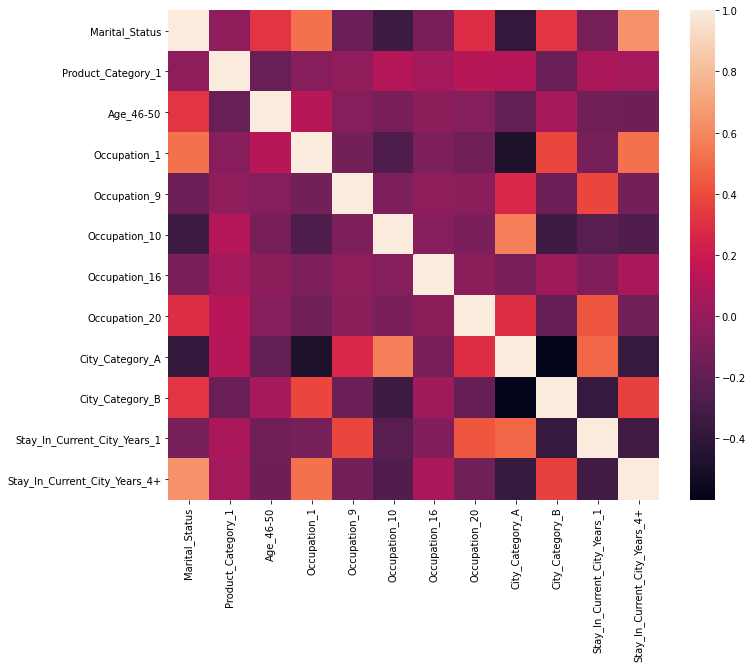

In [263]:
fig_sb, ax_sb = plt.subplots(figsize=(11, 9))
sb.heatmap(smart_df_corr)
plt.show()

In [264]:
CorrKoeff = smart_df_corr

In [265]:
colnames = 0

In [266]:
colnames = CorrKoeff.columns.values.tolist()

In [267]:
Feature_Drop = list(())
Feature_DropNeg = list(())
for each in colnames:
    i = len(CorrKoeff[each])
    for i in range(i):
        if (CorrKoeff.iloc[i][each]  > 0.8) and (CorrKoeff.index[i] != each):
            # print('\n* *XX*|||*XX* * !!WARNING!! ['+str(each)+'] IS CORRELATED WITH '+str(CorrKoeff.index[i])+' BY '+str(CorrKoeff.iloc[i][each])+' * *XX*|||*XX* *')
            Feature_Drop.append(each)
            # pass
        elif (CorrKoeff.iloc[i][each]  < -0.8) and (CorrKoeff.index[i] != each):
            # print('\n- *XX*XX* - Attention: ['+str(each)+'] is correlated with ['+str(CorrKoeff.index[i])+'] by '+str(CorrKoeff.iloc[i][each])+' - *XX*XX* -\n')
            Feature_DropNeg.append(each)
            # pass
        else:
            pass
    # print('----- * ----- '+str(each)+' is [COMPLETE] ----- * -----')

In [268]:
len(Feature_Drop) # these are features that are absolutely certain
# to be removed

0

In [269]:
len(Feature_DropNeg) # these are features that are
# negatively correlated

0

In [270]:
UFeatures_Drop = list(())
UFeatures_DropNeg = list(())

In [271]:
[UFeatures_Drop.append(x) for x in Feature_Drop if x not in UFeatures_Drop]

[]

In [272]:
[UFeatures_DropNeg.append(z) for z in Feature_DropNeg if z not in UFeatures_DropNeg]

[]

In [273]:
length = len(UFeatures_Drop)
lengthNeg = len(UFeatures_DropNeg)

In [274]:
middle_index = length//2 # source code URL: https://www.kite.com/python/answers/how-to-split-a-list-in-half-in-python
middle_indexNeg = lengthNeg//2

In [275]:
len(UFeatures_Drop)

0

In [276]:
len(UFeatures_DropNeg)

0

In [277]:
UFeatures_Droph = UFeatures_Drop[:middle_index]
UFeatures_DropNegh = UFeatures_DropNeg[:middle_indexNeg]

In [278]:
len(UFeatures_Droph)

0

In [279]:
len(UFeatures_DropNegh)

0

In [280]:
UFeatures_Drop_United = list(())

In [281]:
UFeatures_Drop_United = UFeatures_Droph + UFeatures_DropNegh

In [282]:
len(UFeatures_Drop_United)

0

In [283]:
print('--- FEATURES TO BE REMOVED DUE TO INTERNAL CORRELATION ---')
display(UFeatures_Drop_United)

--- FEATURES TO BE REMOVED DUE TO INTERNAL CORRELATION ---


[]

In [284]:
newsmart_df = smart_df.drop(UFeatures_Drop_United, axis=1).copy()


**Linear regression after feature selection**

In [285]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(newsmart_df, target, test_size=0.2)

In [286]:
print ('--- SHAPES ---')
print (Xtrn.shape)
print (Ytrn.shape)
print (Xtest.shape)
print (Ytest.shape)
# print X_test.shape, y_test.shape
# source code URL: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

--- SHAPES ---
(80, 12)
(80,)
(20, 12)
(20,)


In [287]:
# re-indexation of datasets for consistency
# in the future operations of normalization
# Xtrn.reindex
# Ytrn.reindex
# Xtest.reindex
# Ytest.reindex

In [288]:
# *** Normalization of numerical columns with use of mean normalization ***
# We will normalize columns Product_Category_1 and Product_Category_2 in
# datasets Xtrn and Xtest (separately after having split the data between
# Xtrn and Xtest),
# so that the normalization in this way should NOT lead to
# the trained model being impacted by the
# normalization of the testing data together (in one set) with the training data

In [289]:
Xtrn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 51 to 99
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 80 non-null     float64
 1   Product_Category_1             80 non-null     float64
 2   Age_46-50                      80 non-null     float64
 3   Occupation_1                   80 non-null     float64
 4   Occupation_9                   80 non-null     float64
 5   Occupation_10                  80 non-null     float64
 6   Occupation_16                  80 non-null     float64
 7   Occupation_20                  80 non-null     float64
 8   City_Category_A                80 non-null     float64
 9   City_Category_B                80 non-null     float64
 10  Stay_In_Current_City_Years_1   80 non-null     float64
 11  Stay_In_Current_City_Years_4+  80 non-null     float64
dtypes: float64(12)
memory usage: 8.1 KB


In [290]:
# extracting numeric data into the working arrays
numeric_data_Xtrn1 = Xtrn['Product_Category_1'].copy().to_numpy()
# numeric_data_Xtrn2 = Xtrn['Product_Category_2'].copy().to_numpy()
numeric_data_Xtest1 = Xtest['Product_Category_1'].copy().to_numpy()
# numeric_data_Xtest2 = Xtest['Product_Category_2'].copy().to_numpy()

In [291]:
# running normalize() from seaborn
# normalization function
# Source code URL: https://www.educative.io/edpresso/data-normalization-in-python
# and here URL: https://dev-gang.ru/article/-prostyh-sposoba-normalizovat-dannye-v-python-7qqrhmlppl/
from sklearn import preprocessing

normalized_data_Xtrn1 = preprocessing.normalize([numeric_data_Xtrn1])
# normalized_data_Xtrn2 = preprocessing.normalize([numeric_data_Xtrn2])
normalized_data_Xtest1 = preprocessing.normalize([numeric_data_Xtest1])
# normalized_data_Xtest2 = preprocessing.normalize([numeric_data_Xtest2])

In [292]:
# returning normalized data into the datasets and dropping numeric data
normalized_data_Xtrn1

array([[0.09862873, 0.01972575, 0.15780597, 0.15780597, 0.09862873,
        0.15780597, 0.01972575, 0.09862873, 0.09862873, 0.09862873,
        0.15780597, 0.07890298, 0.15780597, 0.21698321, 0.15780597,
        0.15780597, 0.15780597, 0.15780597, 0.15780597, 0.05917724,
        0.01972575, 0.01972575, 0.15780597, 0.09862873, 0.05917724,
        0.15780597, 0.01972575, 0.09862873, 0.01972575, 0.01972575,
        0.01972575, 0.01972575, 0.09862873, 0.15780597, 0.09862873,
        0.01972575, 0.23670895, 0.15780597, 0.01972575, 0.11835448,
        0.01972575, 0.01972575, 0.11835448, 0.01972575, 0.01972575,
        0.01972575, 0.15780597, 0.09862873, 0.09862873, 0.21698321,
        0.01972575, 0.21698321, 0.01972575, 0.03945149, 0.03945149,
        0.09862873, 0.27616045, 0.09862873, 0.23670895, 0.01972575,
        0.03945149, 0.01972575, 0.03945149, 0.09862873, 0.01972575,
        0.05917724, 0.01972575, 0.09862873, 0.05917724, 0.01972575,
        0.07890298, 0.15780597, 0.03945149, 0.01

In [293]:
rshp_trn=int(len(numeric_data_Xtrn1)) # determining the length to reshape
rshp_test=int(len(numeric_data_Xtest1))

In [294]:
# len(normalized_data_Xtrn1)

In [295]:
normalized_data_Xtrn1 = normalized_data_Xtrn1.reshape(rshp_trn,1) #reshaping the array to fit into a dataframe column

In [296]:
# normalized_data_Xtrn2 = normalized_data_Xtrn2.reshape(rshp_trn,1)

In [297]:
normalized_data_Xtest1 = normalized_data_Xtest1.reshape(rshp_test,1)

In [298]:
# normalized_data_Xtest2 = normalized_data_Xtest2.reshape(rshp_test,1)

In [299]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 12)


In [300]:
normalized_data_Xtrn1_df = pd.DataFrame(data=normalized_data_Xtrn1, columns=['Qty_Prod_Cat_1_Nrmd'])

In [301]:
# normalized_data_Xtrn2_df = pd.DataFrame(data=normalized_data_Xtrn2, columns=['Qty_Prod_Cat_2_Nrmd'])

In [302]:
normalized_data_Xtest1_df = pd.DataFrame(data=normalized_data_Xtest1, columns=['Qty_Prod_Cat_1_Nrmd'])
# normalized_data_Xtest2_df = pd.DataFrame(data=normalized_data_Xtest2, columns=['Qty_Prod_Cat_2_Nrmd'])

In [303]:
# normalized_data_Xtrn1_df.info()
# normalized_data_Xtrn2_df.info()
# normalized_data_Xtest1_df.info()
# normalized_data_Xtest2_df.info()

In [304]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 12)


In [305]:
Qty_Prod_Cat_1_Nrmd = normalized_data_Xtrn1_df['Qty_Prod_Cat_1_Nrmd'].tolist()

In [306]:
# Qty_Prod_Cat_1_Nrmd

In [307]:
Xtrn.loc[:,'Qty_Prod_Cat_1_Nrmd'] = Qty_Prod_Cat_1_Nrmd  # adding normalized

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [308]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 13)


In [309]:
Xtrn

,Marital_Status,Product_Category_1,Age_46-50,Occupation_1,Occupation_9,Occupation_10,Occupation_16,Occupation_20,City_Category_A,City_Category_B,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_4+,Qty_Prod_Cat_1_Nrmd
51,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098629
75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.019726
31,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.157806
47,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.157806
59,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.098629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098629
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.019726
15,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.078903
57,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.157806


In [310]:
Xtrn = Xtrn.drop(['Product_Category_1'], axis=1).copy() # dropping numeric data

In [311]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 12)


In [312]:
# Qty_Prod_Cat_2_Nrmd = normalized_data_Xtrn2_df['Qty_Prod_Cat_2_Nrmd'].tolist()

In [313]:
# Qty_Prod_Cat_2_Nrmd

In [314]:
# Xtrn.loc[:,'Qty_Prod_Cat_2_Nrmd'] = Qty_Prod_Cat_2_Nrmd  # adding normalized

In [315]:
# ne rabotaet: Xtrn =  pd.concat([Xtrn,normalized_data_Xtrn2_df], axis=1) # adding normalized

In [316]:
# Xtrn = Xtrn.drop(['Product_Category_2'], axis=1).copy() # dropping numeric data

In [317]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 12)


In [318]:
# ne rabotaet: Xtest = pd.concat([Xtest,normalized_data_Xtest1_df], axis=1) # adding normalized

In [319]:
Qty_Prod_Cat_1_Nrmd_test = normalized_data_Xtest1_df['Qty_Prod_Cat_1_Nrmd'].tolist()

In [320]:
Xtest.loc[:,'Qty_Prod_Cat_1_Nrmd_test'] = Qty_Prod_Cat_1_Nrmd_test  # adding normalized

Xtest = Xtest.drop(['Product_Category_1'], axis=1).copy() # dropping numeric data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [321]:
# ne rabotaet: Xtest = pd.concat([Xtest,normalized_data_Xtest2_df], axis=1) # adding normalized
# Qty_Prod_Cat_2_Nrmd_test = normalized_data_Xtest2_df['Qty_Prod_Cat_2_Nrmd'].tolist()

In [322]:
# Xtest.loc[:,'Qty_Prod_Cat_2_Nrmd_test'] = Qty_Prod_Cat_2_Nrmd_test  # adding normalized
# Xtest = Xtest.drop(['Product_Category_2'], axis=1).copy() # dropping numeric data

In [323]:
# df = df.astype('string')

In [324]:
print ('--- Xtrn SHAPE ---')
print (Xtrn.shape)

--- Xtrn SHAPE ---
(80, 12)


In [325]:
# Xtrn.isna().sum()
# Xtrn = Xtrn.fillna(0)

In [326]:
# fit a model
lm = LinearRegression()
model = lm.fit(Xtrn, Ytrn)
predictions = lm.predict(Xtest)

In [327]:
# Let’s see what (some of) the predictions are:
predictions[0:5]

array([12847.24986196, 11882.80117713, 12847.24986196,   733.34802354,
       11390.39093308])

In [328]:
Ytest = Ytest.astype(float)
predictions = predictions.astype(float)

In [329]:
# source code URL: https://python-school.ru/linear-regression-basis/

# Ytest = np.exp(Ytest)
# predictions = np.exp(predictions)

In [330]:
# source code URL: https://python-school.ru/linear-regression-basis/
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(Ytest, predictions)
mae = mean_absolute_error(Ytest, predictions)
print('Mean Squared Error: %.3f, \nMean Absolute Error: %.3f' % (mse, mae))

Mean Squared Error: 66053282.110, 
Mean Absolute Error: 6924.537
